# **Dataset**
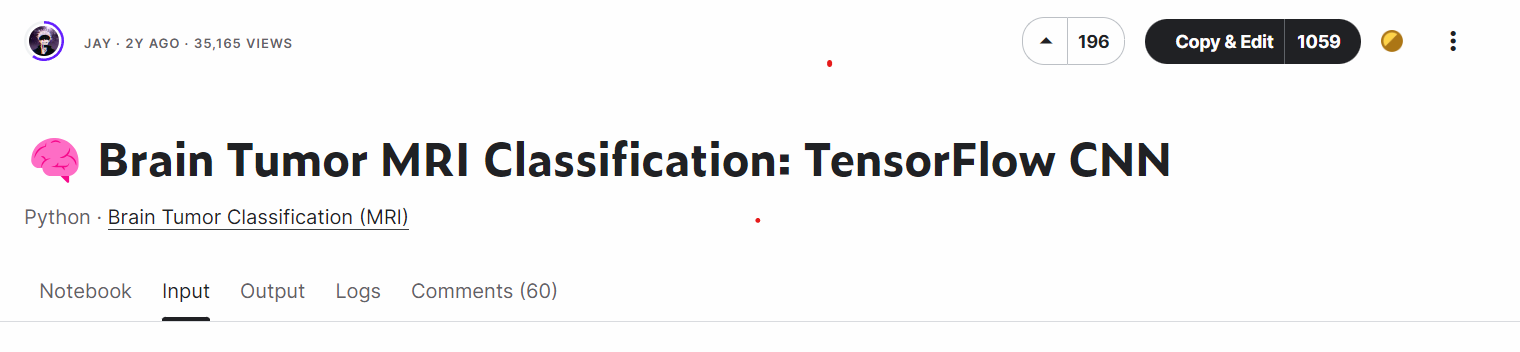
[Brain Tumor MRI](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri)


# Import Library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display, clear_output
from warnings import filterwarnings

# Import Google Colab Library and Mount it

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

# Data Preparation

Using Google Collab Authentication to Extract an Add data

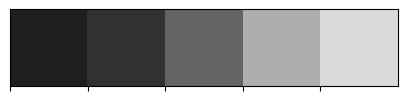

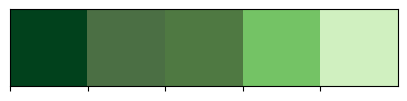

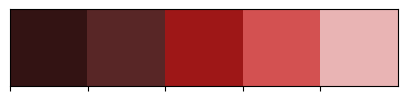

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [ ]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/brain tumor dataset/Training' ,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/brain tumor dataset/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:12<00:00,  5.87it/s]


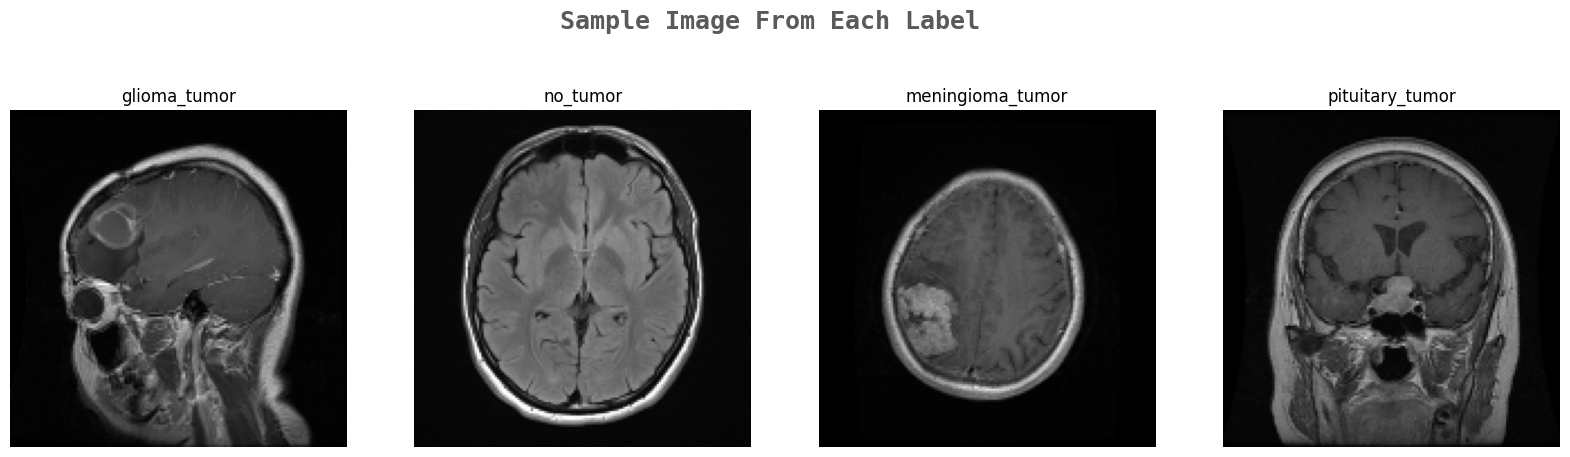

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

# Split Train Test
Split Train Test Data , Proportion 8:2
Then, Perfom One Hot Encoding

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
X_train.shape

(3264, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.2,random_state=64)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# **Transfer Learning**

**Argument **

*Top layer ( True )*

*Evaluasi*

- Model Summary
- Predicition Score library sklearn
- Confusion Matriks
- Plot History

*Hyperparameter Tuning*

- Learning Rate (0.001)
- Loss Function (CategoricalCrossentropy class)
- Optimizer (Adam)
- Epoch 200

*SaveModel*
- H5
- Tflite

# **EfficientNetB0**

In [ ]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

In [ ]:
model_effnet = effnet.output
model_effnet = tf.keras.layers.GlobalAveragePooling2D()(model_effnet)
model_effnet = tf.keras.layers.Dropout(rate=0.5)(model_effnet)
model_effnet = tf.keras.layers.Dense(4,activation='softmax')(model_effnet)
model_effnet = tf.keras.models.Model(inputs=effnet.input, outputs = model_effnet)

In [ ]:
model_effnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 150, 150, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 150, 150, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

In [ ]:
model_effnet.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
history_effnet = model_effnet.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32)

Epoch 1/12
74/74 [==============================] - 383s 5s/step - loss: 0.4935 - accuracy: 0.8195 - val_loss: 0.5464 - val_accuracy: 0.8626
Epoch 2/12
74/74 [==============================] - 366s 5s/step - loss: 0.2031 - accuracy: 0.9319 - val_loss: 0.2254 - val_accuracy: 0.9351
Epoch 3/12
74/74 [==============================] - 353s 5s/step - loss: 0.1189 - accuracy: 0.9583 - val_loss: 0.3062 - val_accuracy: 0.8931
Epoch 4/12
74/74 [==============================] - 352s 5s/step - loss: 0.1387 - accuracy: 0.9566 - val_loss: 0.3041 - val_accuracy: 0.9046
Epoch 5/12
74/74 [==============================] - 349s 5s/step - loss: 0.0853 - accuracy: 0.9719 - val_loss: 0.6709 - val_accuracy: 0.8359
Epoch 6/12
74/74 [==============================] - 350s 5s/step - loss: 0.0653 - accuracy: 0.9787 - val_loss: 0.2075 - val_accuracy: 0.9542
Epoch 7/12
74/74 [==============================] - 351s 5s/step - loss: 0.0627 - accuracy: 0.9774 - val_loss: 0.2968 - val_accuracy: 0.9313
Epoch 8/12
74

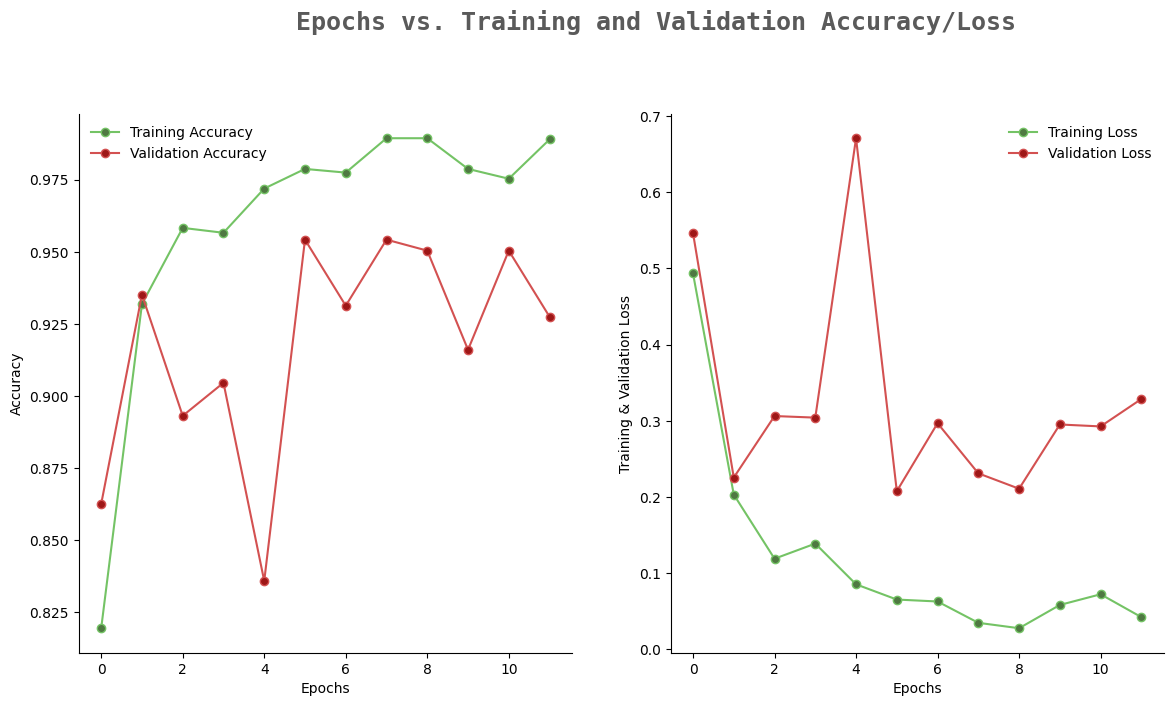

In [ ]:
filterwarnings('ignore')

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
train_acc = history_effnet.history['accuracy']
train_loss = history_effnet.history['loss']
val_acc = history_effnet.history['val_accuracy']
val_loss = history_effnet.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18, fontweight='bold',
         fontname='monospace', color=colors_dark[1], y=1, x=0.28, alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Loss')
ax[1].plot(epochs, val_loss, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

plt.show()

# **VGG 19**

80134624/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

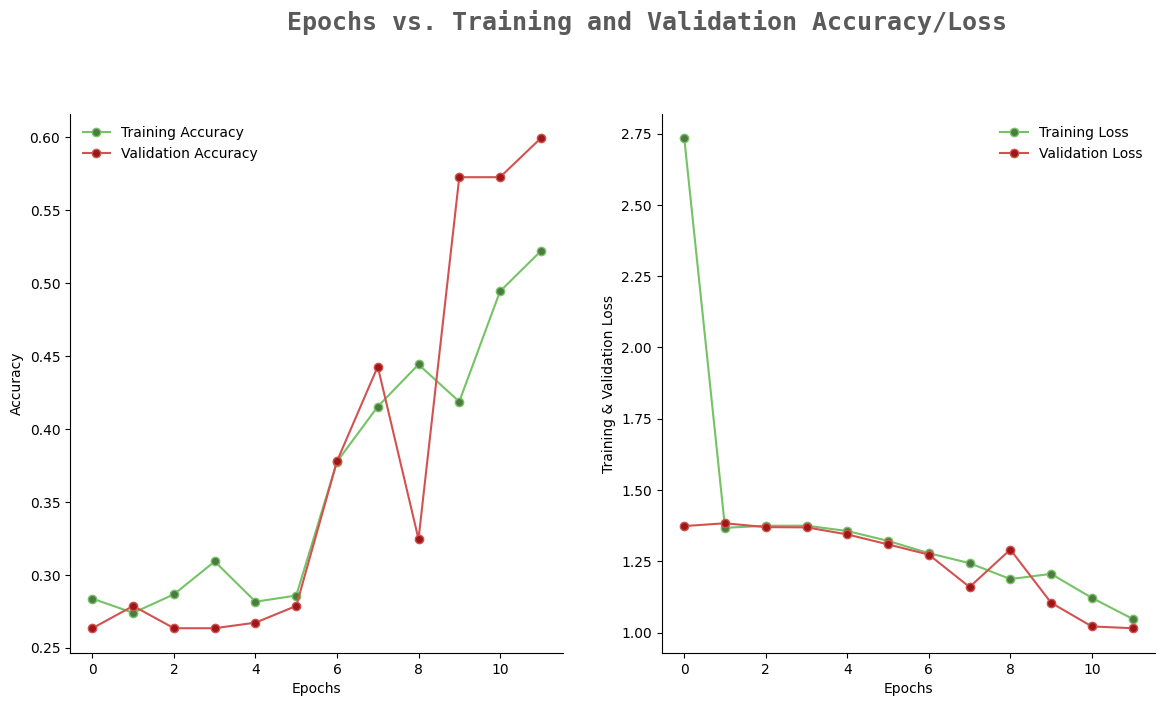

In [ ]:
from tensorflow.keras.applications import VGG19
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Load VGG19 model
vgg = VGG19(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Create your model based on VGG19
model_vgg = vgg.output
model_vgg = tf.keras.layers.GlobalAveragePooling2D()(model_vgg)
model_vgg = tf.keras.layers.Dropout(rate=0.5)(model_vgg)
model_vgg = tf.keras.layers.Dense(4, activation='softmax')(model_vgg)
model_vgg = tf.keras.models.Model(inputs=vgg.input, outputs=model_vgg)
model_vgg.summary()

# Compile the model
model_vgg.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Train the model
history_vgg = model_vgg.fit(X_train, y_train, validation_split=0.1, epochs=12, verbose=1, batch_size=32)

# Plot training history
epochs = [i for i in range(12)]
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
train_acc = history_vgg.history['accuracy']
train_loss = history_vgg.history['loss']
val_acc = history_vgg.history['val_accuracy']
val_loss = history_vgg.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18, fontweight='bold',
             fontname='monospace', color=colors_dark[1], y=1, x=0.28, alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Loss')
ax[1].plot(epochs, val_loss, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

plt.show()


In [ ]:
# Save the model to H5 format
save_path = 'model_vgg.h5'
model_vgg.save(save_path)

print("Model saved successfully to", save_path)

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model_vgg)
tflite_model = converter.convert()

# Save the TFLite model to a file
tflite_model_path = 'model_vgg.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print("TFLite model saved successfully to", tflite_model_path)

Model saved successfully to model_vgg.h5


TFLite model saved successfully to model_vgg.tflite


# **InceptionV3**

In [ ]:
from tensorflow.keras.applications import InceptionV3
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Load InceptionV3 model
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Create your model based on InceptionV3
model_inception = inception.output
model_inception = tf.keras.layers.GlobalAveragePooling2D()(model_inception)
model_inception = tf.keras.layers.Dropout(rate=0.5)(model_inception)
model_inception = tf.keras.layers.Dense(4, activation='softmax')(model_inception)
model_inception = tf.keras.models.Model(inputs=inception.input, outputs=model_inception)
model_inception.summary()



87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                             

In [ ]:
# Compile the model
model_inception.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# Train the model
history_inception = model_inception.fit(X_train, y_train, validation_split=0.1, epochs=12, verbose=1, batch_size=32)

Epoch 1/12
74/74 [==============================] - 352s 5s/step - loss: 0.6246 - accuracy: 0.7782 - val_loss: 1.6348 - val_accuracy: 0.5649
Epoch 2/12
74/74 [==============================] - 335s 5s/step - loss: 0.2871 - accuracy: 0.8995 - val_loss: 1.1762 - val_accuracy: 0.8053
Epoch 3/12
74/74 [==============================] - 335s 5s/step - loss: 0.1874 - accuracy: 0.9476 - val_loss: 2.4084 - val_accuracy: 0.4275
Epoch 4/12
74/74 [==============================] - 336s 5s/step - loss: 0.1673 - accuracy: 0.9510 - val_loss: 0.4646 - val_accuracy: 0.8397
Epoch 5/12
74/74 [==============================] - 336s 5s/step - loss: 0.1248 - accuracy: 0.9608 - val_loss: 0.3522 - val_accuracy: 0.8969
Epoch 6/12
74/74 [==============================] - 332s 4s/step - loss: 0.1150 - accuracy: 0.9604 - val_loss: 0.4745 - val_accuracy: 0.8168
Epoch 7/12
74/74 [==============================] - 336s 5s/step - loss: 0.1204 - accuracy: 0.9591 - val_loss: 0.8029 - val_accuracy: 0.7595
Epoch 8/12
74

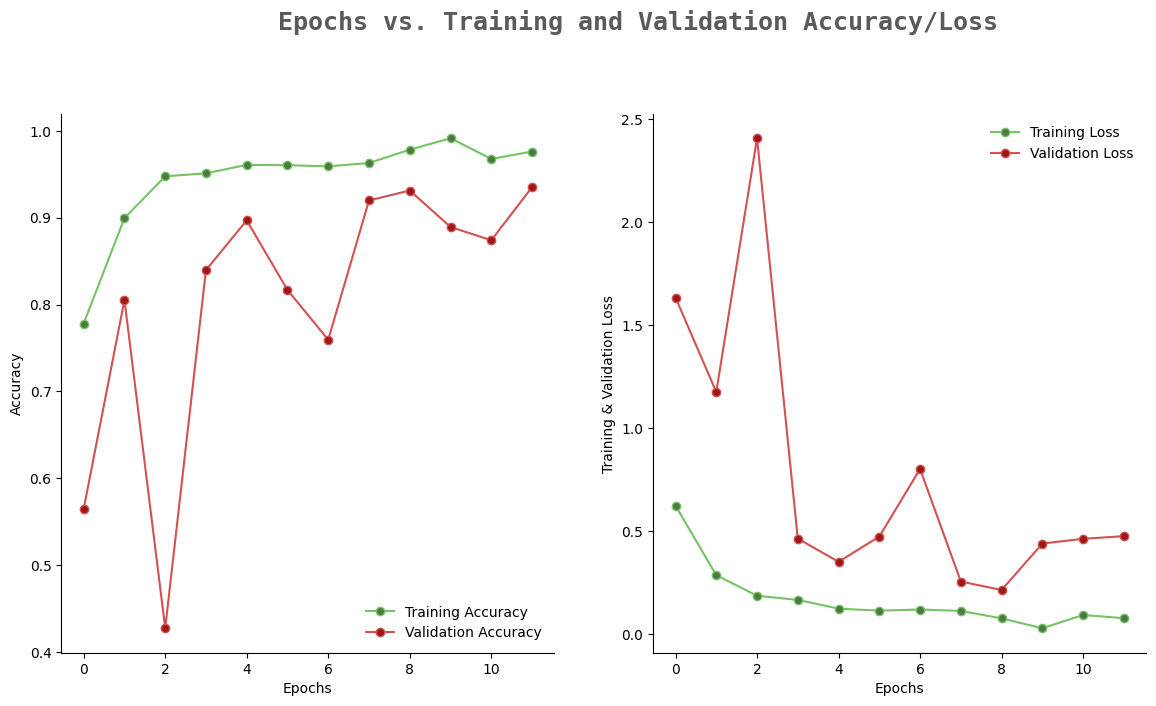

In [ ]:
# Plot training history
epochs = [i for i in range(12)]
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
train_acc = history_inception.history['accuracy']
train_loss = history_inception.history['loss']
val_acc = history_inception.history['val_accuracy']
val_loss = history_inception.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18, fontweight='bold',
             fontname='monospace', color=colors_dark[1], y=1, x=0.28, alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Loss')
ax[1].plot(epochs, val_loss, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

plt.show()

In [ ]:
# Save the model to H5 format
save_path = 'model_inception.h5'
model_inception.save(save_path)

print("Model saved successfully to", save_path)

Model saved successfully to model_inception.h5


In [ ]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model_inception)
tflite_model = converter.convert()

# Save the TFLite model to a file
tflite_model_path = 'model_inception.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print("TFLite model saved successfully to", tflite_model_path)

TFLite model saved successfully to model_inception.tflite


# **Resnet50V2**

In [ ]:
from tensorflow.keras.applications import ResNet50V2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Load ResNet50V2 model
resnet = ResNet50V2(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Create your model based on ResNet50V2
model_resnet = resnet.output
model_resnet = tf.keras.layers.GlobalAveragePooling2D()(model_resnet)
model_resnet = tf.keras.layers.Dropout(rate=0.5)(model_resnet)
model_resnet = tf.keras.layers.Dense(4, activation='softmax')(model_resnet)
model_resnet = tf.keras.models.Model(inputs=resnet.input, outputs=model_resnet)
model_resnet.summary()

94668760/94668760 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)   

In [ ]:
# Compile the model
model_resnet.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# Train the model
history_resnet = model_resnet.fit(X_train, y_train, validation_split=0.1, epochs=12, verbose=1, batch_size=32)

Epoch 1/12
74/74 [==============================] - 822s 11s/step - loss: 0.7306 - accuracy: 0.7382 - val_loss: 4.9063 - val_accuracy: 0.3206
Epoch 2/12
74/74 [==============================] - 784s 11s/step - loss: 0.3978 - accuracy: 0.8676 - val_loss: 8.7402 - val_accuracy: 0.4313
Epoch 3/12
74/74 [==============================] - 805s 11s/step - loss: 0.2326 - accuracy: 0.9234 - val_loss: 7.3089 - val_accuracy: 0.1756
Epoch 4/12
74/74 [==============================] - 816s 11s/step - loss: 0.2502 - accuracy: 0.9191 - val_loss: 1.7121 - val_accuracy: 0.7176
Epoch 5/12
74/74 [==============================] - 811s 11s/step - loss: 0.1458 - accuracy: 0.9515 - val_loss: 2.3305 - val_accuracy: 0.5305
Epoch 6/12
74/74 [==============================] - 803s 11s/step - loss: 0.1287 - accuracy: 0.9544 - val_loss: 0.4844 - val_accuracy: 0.8473
Epoch 7/12
74/74 [==============================] - 800s 11s/step - loss: 0.1150 - accuracy: 0.9655 - val_loss: 0.3416 - val_accuracy: 0.8893
Epoch 

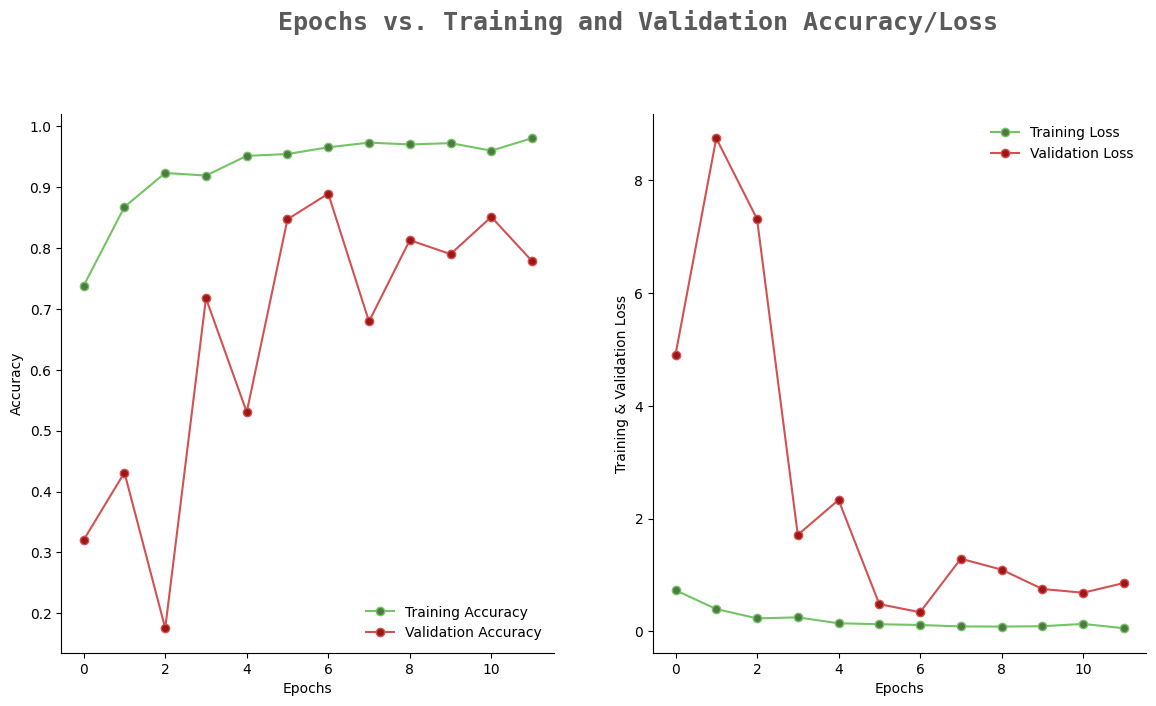

In [ ]:
# Plot training history
epochs = [i for i in range(12)]
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
train_acc = history_resnet.history['accuracy']
train_loss = history_resnet.history['loss']
val_acc = history_resnet.history['val_accuracy']
val_loss = history_resnet.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18, fontweight='bold',
             fontname='monospace', color=colors_dark[1], y=1, x=0.28, alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Loss')
ax[1].plot(epochs, val_loss, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

plt.show()

In [ ]:
# Save the model to H5 format
save_path = 'model_resnet.h5'
model_resnet.save(save_path)

print("Model saved successfully to", save_path)

Model saved successfully to model_resnet.h5


In [ ]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model_resnet)
tflite_model = converter.convert()

# Save the TFLite model to a file
tflite_model_path = 'model_resnet.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print("TFLite model saved successfully to", tflite_model_path)

TFLite model saved successfully to model_resnet.tflite


# **DenseNet201**

74836368/74836368 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 156, 156, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 75, 75, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization

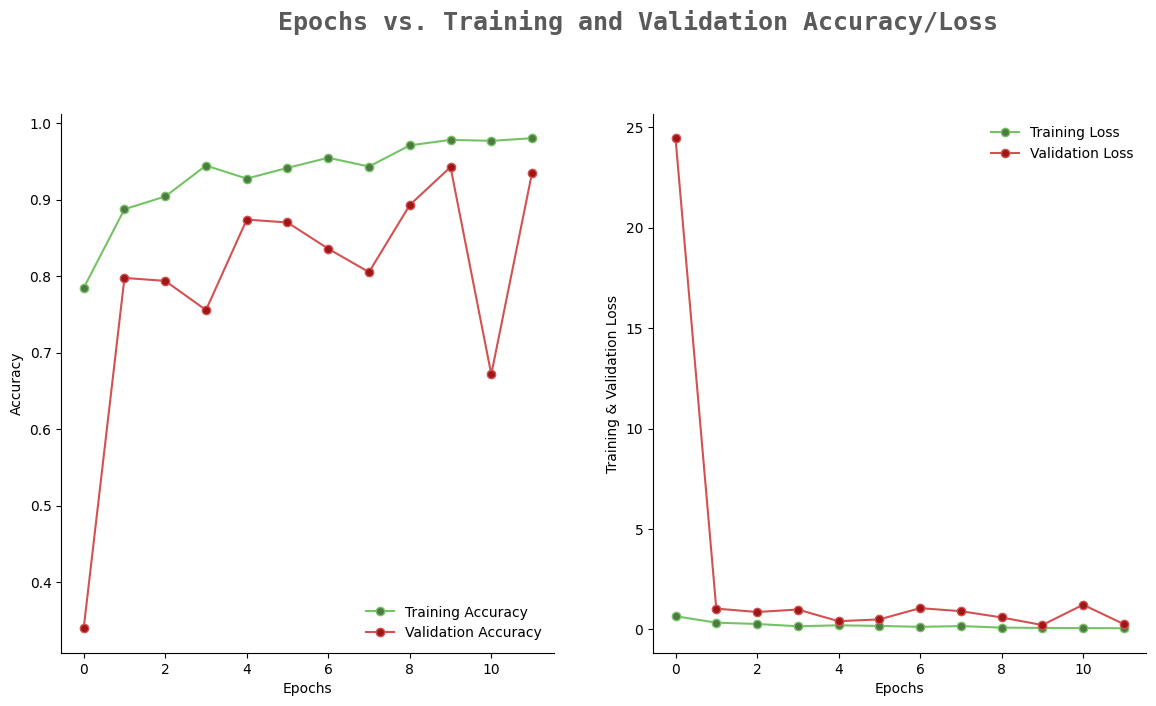

In [ ]:
from tensorflow.keras.applications import DenseNet201
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Load DenseNet201 model
densenet = DenseNet201(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Create your model based on DenseNet201
model_densenet = densenet.output
model_densenet = tf.keras.layers.GlobalAveragePooling2D()(model_densenet)
model_densenet = tf.keras.layers.Dropout(rate=0.5)(model_densenet)
model_densenet = tf.keras.layers.Dense(4, activation='softmax')(model_densenet)
model_densenet = tf.keras.models.Model(inputs=densenet.input, outputs=model_densenet)
model_densenet.summary()

# Compile the model
model_densenet.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Train the model
history_densenet = model_densenet.fit(X_train, y_train, validation_split=0.1, epochs=12, verbose=1, batch_size=32)

# Plot training history
epochs = [i for i in range(12)]
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
train_acc = history_densenet.history['accuracy']
train_loss = history_densenet.history['loss']
val_acc = history_densenet.history['val_accuracy']
val_loss = history_densenet.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18, fontweight='bold',
             fontname='monospace', color=colors_dark[1], y=1, x=0.28, alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o', markerfacecolor=colors_green[2], color=colors_green[3],
           label='Training Loss')
ax[1].plot(epochs, val_loss, marker='o', markerfacecolor=colors_red[2], color=colors_red[3],
           label='Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

plt.show()


In [ ]:
# Save the model to H5 format
save_path = 'model_densenet.h5'
model_densenet.save(save_path)

print("Model saved successfully to", save_path)

Model saved successfully to model_densenet.h5


In [ ]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model_densenet)
tflite_model = converter.convert()

# Save the TFLite model to a file
tflite_model_path = 'model_densenet.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print("TFLite model saved successfully to", tflite_model_path)

TFLite model saved successfully to model_densenet.tflite


# **Conclusion**